In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [111]:
# Read the dataset
data = pd.read_excel('/content/Online Retail Data Set.xlsx')

In [112]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [113]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [114]:
#shape of the dataset
data.shape

(541909, 8)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##EDA

In [116]:
#null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [117]:
# Check the number of duplicated values
data.duplicated().sum().sum()

5268

In [118]:
# Let's get the duplicated rows
duplicates = data[data.duplicated()]
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


Products purchased on the same invoice appear to have been considered duplicates. However, there are no duplicates in the Description column.

In [119]:
#Number of unique customers
data['CustomerID'].nunique()

4372

In [120]:
#Number of purchases
data['InvoiceNo'].nunique()

25900

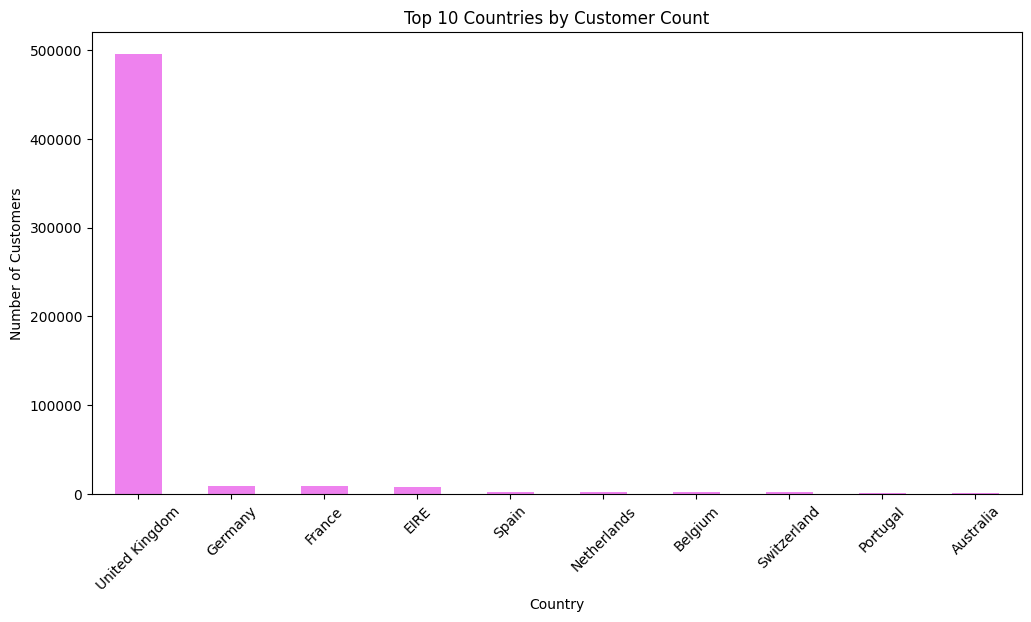

In [121]:
# Top ten country's customer count
plt.figure(figsize=(12, 6))
data.Country.value_counts()[:10].plot(kind='bar', color='violet')
plt.title('Top 10 Countries by Customer Count')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


So we have approximately one year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the United Kingdom).

In [122]:
#Drop Null Values
data.dropna(subset=['CustomerID'], inplace=True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [124]:
#Handle negative quantity
data = data.loc[data['Quantity'] > 0]
# Let's check negative records
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [125]:
#Remove rows with negative price
data = data.loc[data['UnitPrice'] > 0]
# Let's check negative records
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Period of time for the purchase records is from December 1, 2010 to December 9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month.

In [126]:
data = data.loc[data['InvoiceDate'] < '2011-12-01']
# Let's check the time period
data['InvoiceDate'].min(), data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:37:00'))

Calculate total sales


In [127]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
data_orders = data.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})
data_orders.head(8)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00

In [128]:
data_orders['InvoiceDate'].max(), data_orders['InvoiceDate'].min()

(Timestamp('2011-11-30 17:37:00'), Timestamp('2010-12-01 08:26:00'))

To predict and calculate CLTV, we must estimate the frequency, recency, and total amount of purchases made by each customer. We will collect basic information about each customer's average and lifetime purchase amount, as well as the duration and frequency of purchases.


In [129]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [130]:
summary = data_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [131]:
summary.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [132]:
#Number of purchases
summary.columns = ['_'.join(col).lower() for col in summary.columns]
summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [133]:
summary = summary.loc[summary['invoicedate_purchase_duration'] > 0]
summary.shape

(2692, 9)

Text(0.5, 1.0, 'Number of purchases made by repeat customers')

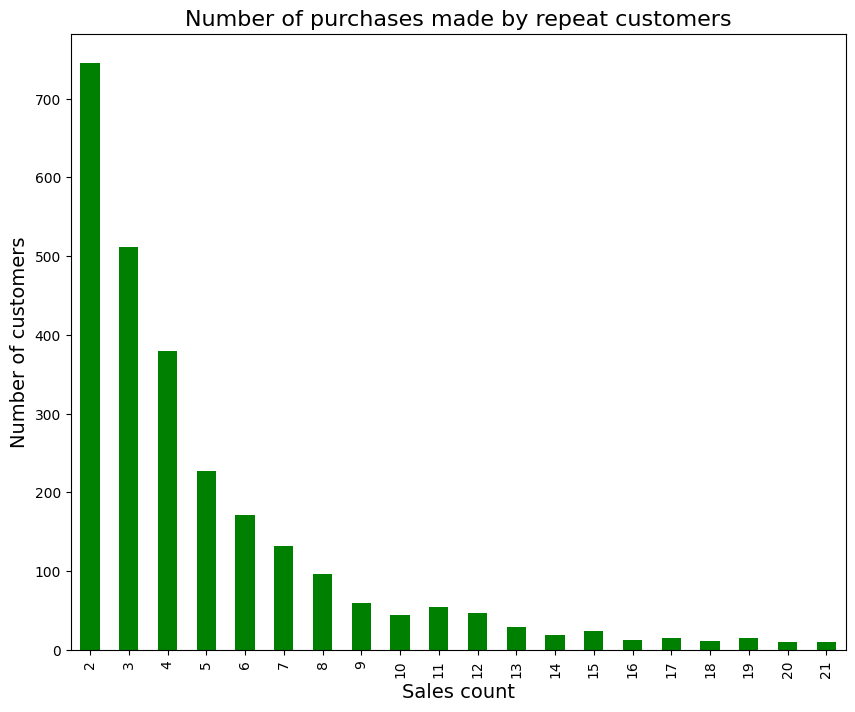

In [134]:
# Let's look at the number of purchases
ax = summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar',
        color='green',
        figsize=(10,8),
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16)

Text(0.5, 1.0, 'Frequency of purchases made by repeat customers')

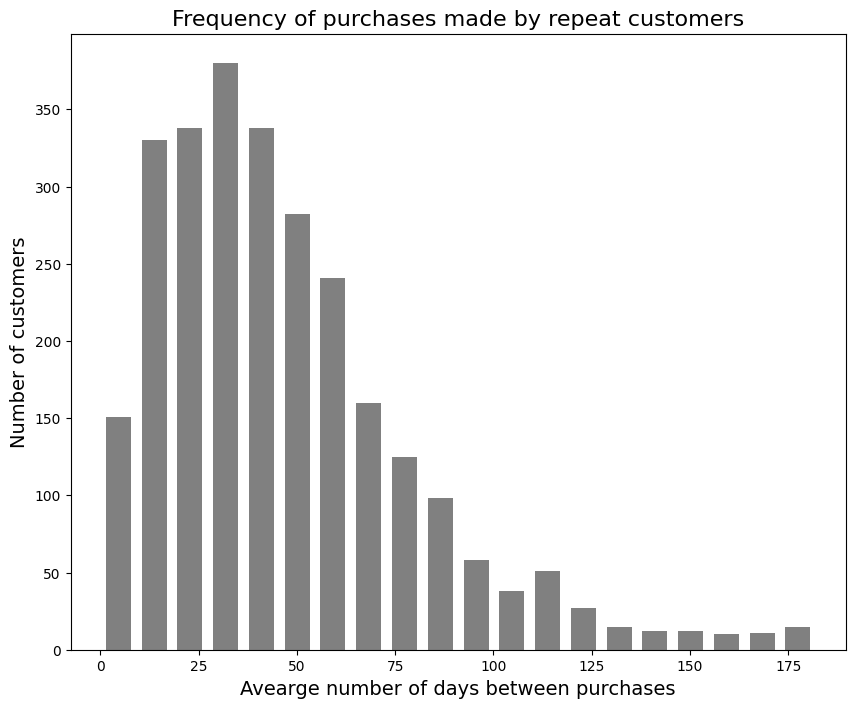

In [135]:
#Average number of days between purchases
ax = summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='grey',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16)

Predict 3-month CLTV


In [136]:
#Prepare data
cltv_freq = '3M'
df_data = data_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=cltv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]
df_data = df_data.reset_index()
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [137]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}
map_date_month

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [138]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


In [139]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M
M_1    2406
M_2    2161
M_3    1991
M_4    1776
M_5     885
Name: count, dtype: int64

In [140]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'],
                values=['sales_sum', 'sales_avg', 'sales_count'],
                columns='M',
                index='CustomerID')
df_features.reset_index()

CustomerID   sales_avg                                sales_count       \
M                       M_2      M_3           M_4     M_5         M_2  M_3   
0       12346.0         NaN      NaN  77183.600000     NaN         NaN  NaN   
1       12347.0  584.910000  509.385    475.390000  711.79         1.0  2.0   
2       12348.0  310.000000  367.000    227.440000  892.80         1.0  1.0   
3       12350.0         NaN      NaN    334.400000     NaN         NaN  NaN   
4       12352.0  316.250000      NaN    312.362000     NaN         2.0  NaN   
...         ...         ...      ...           ...     ...         ...  ...   
3611    18280.0         NaN      NaN    180.600000     NaN         NaN  NaN   
3612    18281.0         NaN   80.820           NaN     NaN         NaN  1.0   
3613    18282.0  100.210000      NaN           NaN     NaN         1.0  NaN   
3614    18283.0   92.696667  131.170    105.966667     NaN         3.0  4.0   
3615    18287.0         NaN  765.280           NaN     NaN         NaN  1.0   

               sales_sum                             
M     M_4  M_5       M_2      M_3       M_4     M_5  
0     1.0  NaN       NaN      NaN  77183.60     NaN  
1     1.0  1.0    584.91  1018.77    475.39  711.79  
2     1.0  1.0    310.00   367.00    227.44  892.80  
3     1.0  NaN       NaN      NaN    334.40     NaN  
4     5.0  NaN    632.50      NaN   1561.81     NaN  
...   ...  ...       ...      ...       ...     ...  
3611  1.0  NaN       NaN      NaN    180.60     NaN  
3612  NaN  NaN       NaN    80.82       NaN     NaN  
3613  NaN  NaN    100.21      NaN       NaN     NaN  
3614  3.0  NaN    278.09   524.68    317.90     NaN  
3615  NaN  NaN       NaN   765.28       NaN     NaN  

[3616 rows x 13 columns]

In [141]:
df_features.columns = ['_'.join(col) for col in df_features.columns]
df_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [142]:
df_features.reset_index(level=0, inplace=True)
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
4,12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [143]:
df_features.fillna(0, inplace=True)
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [144]:
#Target variable
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]
df_target.columns = ['CustomerID', 'CLV_'+cltv_freq]
df_target.shape

(2406, 2)

In [145]:
df_sample_set = df_features.merge(
                df_target,
                left_on='CustomerID',
                right_on='CustomerID',
                how='left')
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,NaN
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,NaN
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [146]:
df_sample_set.fillna(0, inplace=True)
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


###Build linear regression

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features],
                                    df_sample_set[target_var],
                                    random_state=2,
                                    test_size=0.35)
lin_reg = LinearRegression(n_jobs=1)
lin_reg.fit(X_train, y_train)
LinearRegression(n_jobs=1)
lin_reg.intercept_

-17.526580313488694

In [149]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,sales_avg_M_2,0.211380
1,sales_avg_M_3,-0.059222
2,sales_avg_M_4,0.091413
3,sales_avg_M_5,-0.581033
4,sales_count_M_2,128.559625
5,sales_count_M_3,-55.323992
6,sales_count_M_4,18.092563
7,sales_count_M_5,-39.690706
8,sales_sum_M_2,0.251125
9,sales_sum_M_3,0.377412


###Evaluate the model

In [150]:
from sklearn.metrics import r2_score, median_absolute_error
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

In [151]:
#R-Squared
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.71
R-Squared for Test set: 0.71


In [152]:
#Median Absolute Error
print('Median Absolute Error for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Median Absolute Error for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

Median Absolute Error for Train set: 202.41
Median Absolute Error for Test set: 205.20


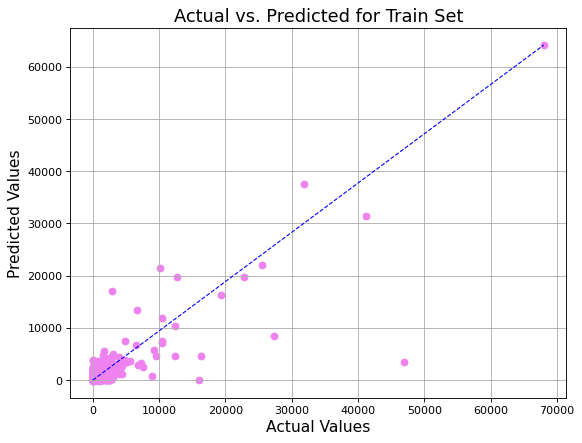

In [153]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='violet')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='blue', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Train Set', fontsize=16)
plt.grid()

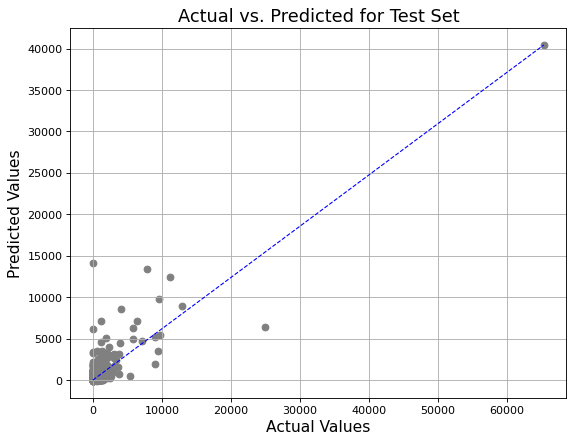

In [154]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='grey')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='blue', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.